In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [14]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=600, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

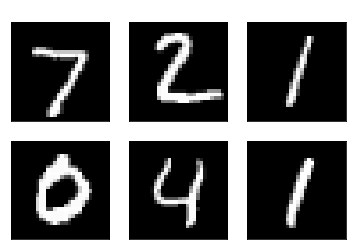

In [15]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]),color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [16]:
# Hyper-parameters 
input_size = 784 # 28x28
num_epochs = 10
learning_rate = 0.001
kernel_size = 4

In [17]:
class CNN(nn.Module):
    def __init__(self,):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN       
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x

In [18]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

In [19]:
train_losses = []
train_epoch = []
train_acc = []
test_losses = []
test_epoch = []

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):  
        # Forward pass
        prediction = cnn(images)
        loss = loss_func(prediction, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(prediction.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            train_epoch.append(epoch+1)
            train_losses.append(loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy : {acc} %')
            train_acc.append(acc)

Epoch [1/10], Step [100/100], Loss: 0.3825
Epoch [1/10], Accuracy : 68.39666666666666 %
Epoch [2/10], Step [100/100], Loss: 0.1581
Epoch [2/10], Accuracy : 91.92166666666667 %
Epoch [3/10], Step [100/100], Loss: 0.1436
Epoch [3/10], Accuracy : 95.13666666666667 %
Epoch [4/10], Step [100/100], Loss: 0.0849
Epoch [4/10], Accuracy : 96.475 %
Epoch [5/10], Step [100/100], Loss: 0.0913
Epoch [5/10], Accuracy : 97.11166666666666 %
Epoch [6/10], Step [100/100], Loss: 0.1277
Epoch [6/10], Accuracy : 97.545 %
Epoch [7/10], Step [100/100], Loss: 0.0672
Epoch [7/10], Accuracy : 97.78166666666667 %
Epoch [8/10], Step [100/100], Loss: 0.0492
Epoch [8/10], Accuracy : 98.03166666666667 %
Epoch [9/10], Step [100/100], Loss: 0.0686
Epoch [9/10], Accuracy : 98.14833333333333 %
Epoch [10/10], Step [100/100], Loss: 0.0515
Epoch [10/10], Accuracy : 98.25333333333333 %


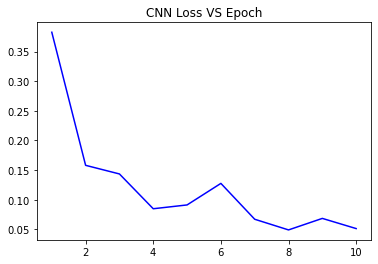

In [20]:
#plot
plt.plot(train_epoch,train_losses,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

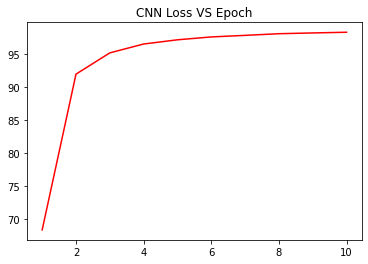

In [21]:
#plot
plt.plot(train_epoch,train_acc,color="red")
plt.title('CNN Loss VS Epoch')
plt.show()

In [22]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for test_images, test_labels in test_loader:
        outputs = cnn(test_images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += test_labels.size(0)
        n_correct += (predicted == test_labels).sum().item()
        
        for i in range(100):
            label = test_labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {i}: {acc} %')

Accuracy of the network: 98.2 %
Accuracy of 0: 98.87755102040816 %
Accuracy of 1: 99.55947136563877 %
Accuracy of 2: 98.54651162790698 %
Accuracy of 3: 99.5049504950495 %
Accuracy of 4: 99.38900203665987 %
Accuracy of 5: 97.86995515695067 %
Accuracy of 6: 97.59916492693111 %
Accuracy of 7: 97.37354085603113 %
Accuracy of 8: 97.3305954825462 %
Accuracy of 9: 95.73835480673935 %


In [23]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        prediction = cnn(images)
        # max returns (value ,index)
        _, predicted = torch.max(prediction.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {acc} %')

Accuracy of the network on the test images: 98.2 %
